In [291]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("Paired"))

# Задача №2

In [292]:
df = pd.read_csv('exam2.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,0,1,2,3,4,5,6,7,8,9
0,0.460521,0.052271,-0.190163,-0.149811,-0.096675,0.249496,-2.556175,0.138847,-0.330711,-0.353245
1,-0.204803,-0.178849,-1.178314,-0.086920,-0.732362,-1.184347,0.275323,0.037774,-0.026011,0.003213
2,-0.238544,-0.168682,-0.408354,1.665049,0.095409,-0.128765,0.381462,0.225658,-0.032616,0.033582
3,-0.378401,-0.718953,-0.078041,0.183084,-0.237282,0.056598,-0.053563,1.894084,-0.075797,0.845153
4,-0.344862,0.568539,0.096968,0.140094,-1.316110,-0.173505,0.147472,0.267697,0.191940,-0.014284
...,...,...,...,...,...,...,...,...,...,...
95,-0.674606,-0.292973,-0.308459,0.830822,0.102060,0.356199,-0.179795,-1.450756,-0.393348,-0.199684
96,-0.110175,0.019225,0.215426,0.675602,0.027000,0.027462,0.016720,0.313198,0.274246,0.061679
97,0.534225,-0.687430,-0.008197,0.528756,-0.320411,0.598911,0.339785,0.652534,-0.150459,1.618233
98,0.137406,0.178634,0.129492,1.589267,1.602173,-0.266408,0.630428,-2.837334,-2.256474,0.097897


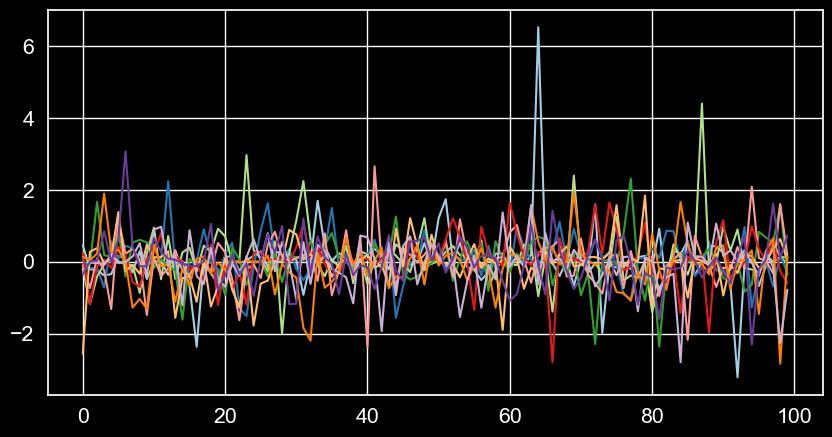

In [293]:
plt.figure(figsize=(10,5))
plt.plot(df);

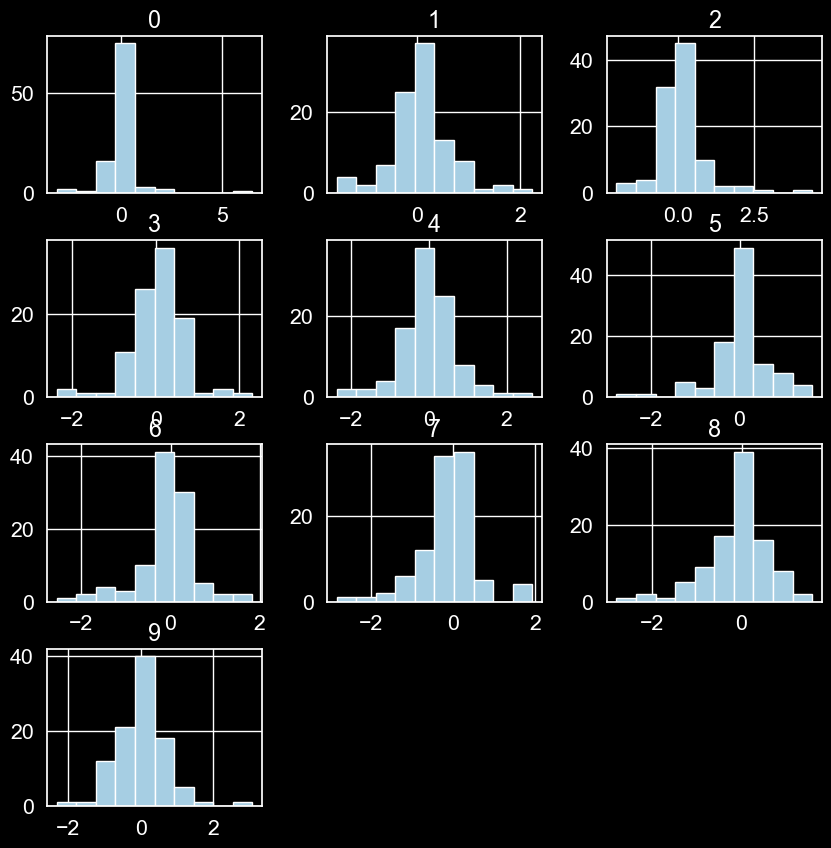

In [294]:
df.hist(figsize=(10, 10));

In [295]:
X = np.array(df)
for i in range(X.shape[0]):
    if st.shapiro(X[i])[1] < 0.05:
        print("На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[%0.f]" % i)

На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[0]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[1]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[2]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[3]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[4]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[6]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[12]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[13]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[16]
На уровне значимости 0.05 тест Шапиро-Уилка отвергает предположение о нормальности выборки X[22]
На уровне значимости 0.05 тест Шапир

## Контролируем FDR - восходящие процедуры

In [296]:
from scipy.stats import spearmanr, pearsonr, kendalltau

def apply_criterea(X, correlation = pearsonr):  # hypothesis is absence of correlation
    if correlation == pearsonr:
        print("Pearson")
    if correlation == spearmanr:
        print("Spearman")
    if correlation == kendalltau:
        print("Kendall")
        
    n = X.shape[0]
    pvalues = [] 
    indexes = [''] * int(n * (n-1) / 2)
    counter = 0
    for i in range(n):
        for j in range(i+1, n):
            pvalues.append(correlation(X[i], X[j])[1])
            indexes[counter] = {i,j}
            counter = counter + 1
            
    return np.array(pvalues), indexes

### Метод Бенджамини-Хохберга

In [297]:
def Hochberg(data, alpha=0.05):
    pvalues = data[0]
    indexes = data[1]
    print("total length:", len(pvalues))
    m = pvalues.shape[0]
    stop = -1
    for i, pval in enumerate(sorted(pvalues, reverse=True)):
        if pval < alpha*(i + 1)/m:
            stop = m - i
            break
    print("stopped at:", stop)
    i, j = indexes[stop]
    print("i.e. samples with indixes", i,'and', j, 'are not uncorrelated')
    return {i, j}

In [298]:
Hochberg(apply_criterea(X[:10, :], spearmanr), 0.05)

Spearman
total length: 45
stopped at: 2
i.e. samples with indixes 0 and 3 are not uncorrelated


{0, 3}

In [299]:
Hochberg(apply_criterea(X, pearsonr), 0.05)

Pearson
total length: 4950
stopped at: 259
i.e. samples with indixes 65 and 2 are not uncorrelated


{2, 65}

In [300]:
Hochberg(apply_criterea(X, kendalltau), 0.05)

Kendall
total length: 4950
stopped at: 209
i.e. samples with indixes 2 and 15 are not uncorrelated


{2, 15}

### Метод Бенджамини-Иекутиели

In [301]:
def Iekutelli(data, alpha):
    pvalues = data[0]
    indexes = data[1]
    print("total length:", len(pvalues))
    m = pvalues.shape[0]
    stop = -1
    const = (1./(1+np.arange(m))).sum()
    for i, pval in enumerate(sorted(pvalues, reverse=True)):
        if pval < alpha*(i+1)/(m*const):
            stop = m - i
            break
    print("stopped at:", stop)
    i, j = indexes[stop]
    print("i.e. samples with indixes", i,'and', j, 'are not uncorrelated')
    return {i, j}

In [302]:
Iekutelli(apply_criterea(X, spearmanr), 0.05)

Spearman
total length: 4950
stopped at: 25
i.e. samples with indixes 0 and 26 are not uncorrelated


{0, 26}

In [303]:
Iekutelli(apply_criterea(X, pearsonr), 0.05)

Pearson
total length: 4950
stopped at: 48
i.e. samples with indixes 0 and 49 are not uncorrelated


{0, 49}

In [304]:
Iekutelli(apply_criterea(X, kendalltau), 0.05)

Kendall
total length: 4950
stopped at: 17
i.e. samples with indixes 0 and 18 are not uncorrelated


{0, 18}

Коэффициент конкордации Кендалла

In [305]:
def kendall_w(expt_ratings):
    m = expt_ratings.shape[0]
    n = expt_ratings.shape[1]
    denom = m**2 * (n**3 - n)
    rating_sums = np.sum(expt_ratings, axis=0)
    S = n * np.var(rating_sums)
    return 12*S/denom

In [306]:
kendall_w(np.argsort(X))

0.022475151515151514

Kendall's W всё-таки больше 0, значит выборки не являются независимыми в совокупности, а значит, есть скоррелированные выборки. Что подтверждает результат выше.

# Задача №3

In [307]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("Paired"))

In [308]:
df = pd.DataFrame(pd.read_csv("exam3_train.csv"))
df = df.drop(columns=["Unnamed: 0"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,1.096009,-2.251521,60.544749,8.375671,-31.034857,-5944.498190,-269.516058,-2324.400953,-386.287944,-2979.475433,-585.480262,-2225.876315,3877.281924,-27.976955,3.074012
1,-2.527494,3.445968,-0.005847,0.051814,-81.173402,-6.642901,-4.357013,1.641558,-3.962568,277.502344,-17.660413,-291.258427,6.427586,30.601345,-80.080840
2,1.564305,-11.640334,-0.886279,3.849797,3283.401988,164.632534,192.396957,160.809032,188.757954,-785.744292,75.328727,185.869718,-81.210667,2099.574752,4.879797
3,3.882786,-1002.864722,-14.713077,-48.076934,-72.323682,-5180.952590,-310.460146,-321.011017,-354.343733,-352.158343,-438.593035,-404.332582,3757.654167,-18.398550,2.430876
4,-0.041497,0.050907,6.883107,-30.155401,-15.329080,107.271797,3.801768,44.981012,-1024.146027,-1515.873930,-120.157728,-142.519105,77.067593,369.010217,-3.223506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-2.780340,1.351701,7.633649,37.155427,4.467699,-15.413172,-23.586727,-14.421366,-9.547455,20.720831,-11.741027,-4.493778,4.630750,-2.628136,-938.774682
345,2.039174,-2.859193,-0.574397,0.307657,-51.063992,-241.506768,11.819158,-15.118732,-245.498878,-27.619485,-104.750167,-142.649958,234.773787,-23.973311,-11.954873
346,1.460826,3.958217,12.299686,-9.395362,-1.403745,37.708439,45.948123,-4.705659,30.592151,204.713740,83.828691,21.089693,-19.414506,-1.825774,23.635055
347,-31.928502,-2.071737,-1.342858,58.643716,96.737394,-4.817535,-9.815715,2.016168,49.825204,-0.301533,-1.206908,16.278054,-21.169104,-4.180693,58.145514


In [309]:
X = df.drop(columns="y")
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.096009,-2.251521,60.544749,8.375671,-31.034857,-5944.498190,-269.516058,-2324.400953,-386.287944,-2979.475433,-585.480262,-2225.876315,3877.281924,-27.976955
1,-2.527494,3.445968,-0.005847,0.051814,-81.173402,-6.642901,-4.357013,1.641558,-3.962568,277.502344,-17.660413,-291.258427,6.427586,30.601345
2,1.564305,-11.640334,-0.886279,3.849797,3283.401988,164.632534,192.396957,160.809032,188.757954,-785.744292,75.328727,185.869718,-81.210667,2099.574752
3,3.882786,-1002.864722,-14.713077,-48.076934,-72.323682,-5180.952590,-310.460146,-321.011017,-354.343733,-352.158343,-438.593035,-404.332582,3757.654167,-18.398550
4,-0.041497,0.050907,6.883107,-30.155401,-15.329080,107.271797,3.801768,44.981012,-1024.146027,-1515.873930,-120.157728,-142.519105,77.067593,369.010217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-2.780340,1.351701,7.633649,37.155427,4.467699,-15.413172,-23.586727,-14.421366,-9.547455,20.720831,-11.741027,-4.493778,4.630750,-2.628136
345,2.039174,-2.859193,-0.574397,0.307657,-51.063992,-241.506768,11.819158,-15.118732,-245.498878,-27.619485,-104.750167,-142.649958,234.773787,-23.973311
346,1.460826,3.958217,12.299686,-9.395362,-1.403745,37.708439,45.948123,-4.705659,30.592151,204.713740,83.828691,21.089693,-19.414506,-1.825774
347,-31.928502,-2.071737,-1.342858,58.643716,96.737394,-4.817535,-9.815715,2.016168,49.825204,-0.301533,-1.206908,16.278054,-21.169104,-4.180693


In [310]:
y = df["y"]
y

0        3.074012
1      -80.080840
2        4.879797
3        2.430876
4       -3.223506
          ...    
344   -938.774682
345    -11.954873
346     23.635055
347     58.145514
348     58.721761
Name: y, Length: 349, dtype: float64

Гистограммы для таргета

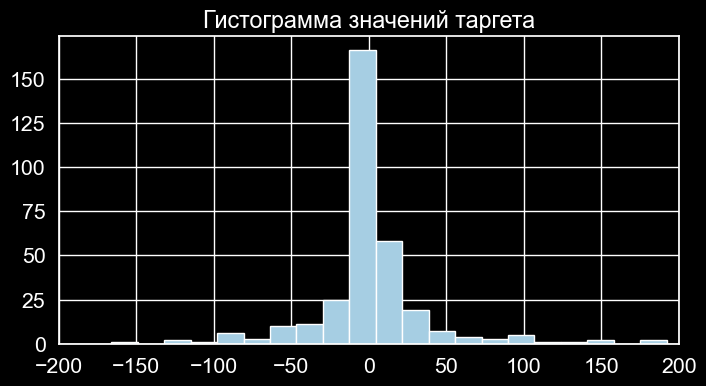

In [311]:
plt.figure(figsize=(8, 4))
y.hist(bins=1000)
plt.xlim(-200, 200)
plt.title("Гистограмма значений таргета");

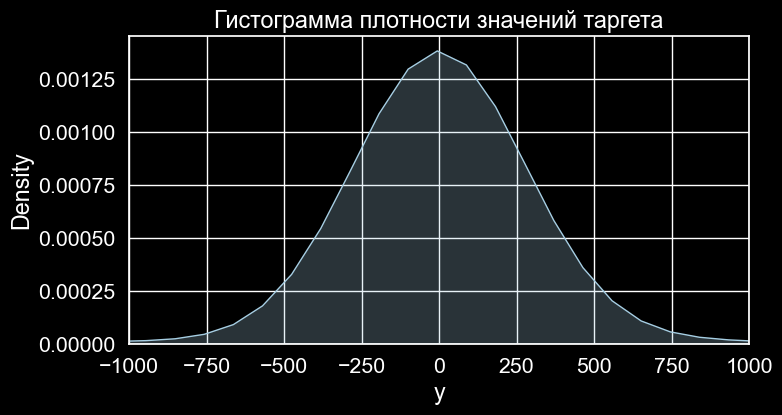

In [312]:
plt.figure(figsize=(8, 4))
sns.kdeplot(y, shade=True)
plt.xlim(-1000, 1000)
plt.title("Гистограмма плотности значений таргета");

Во-первых, видим, что выборка из распределения, симметричного относительно нуля.

Гистограммы для значений X

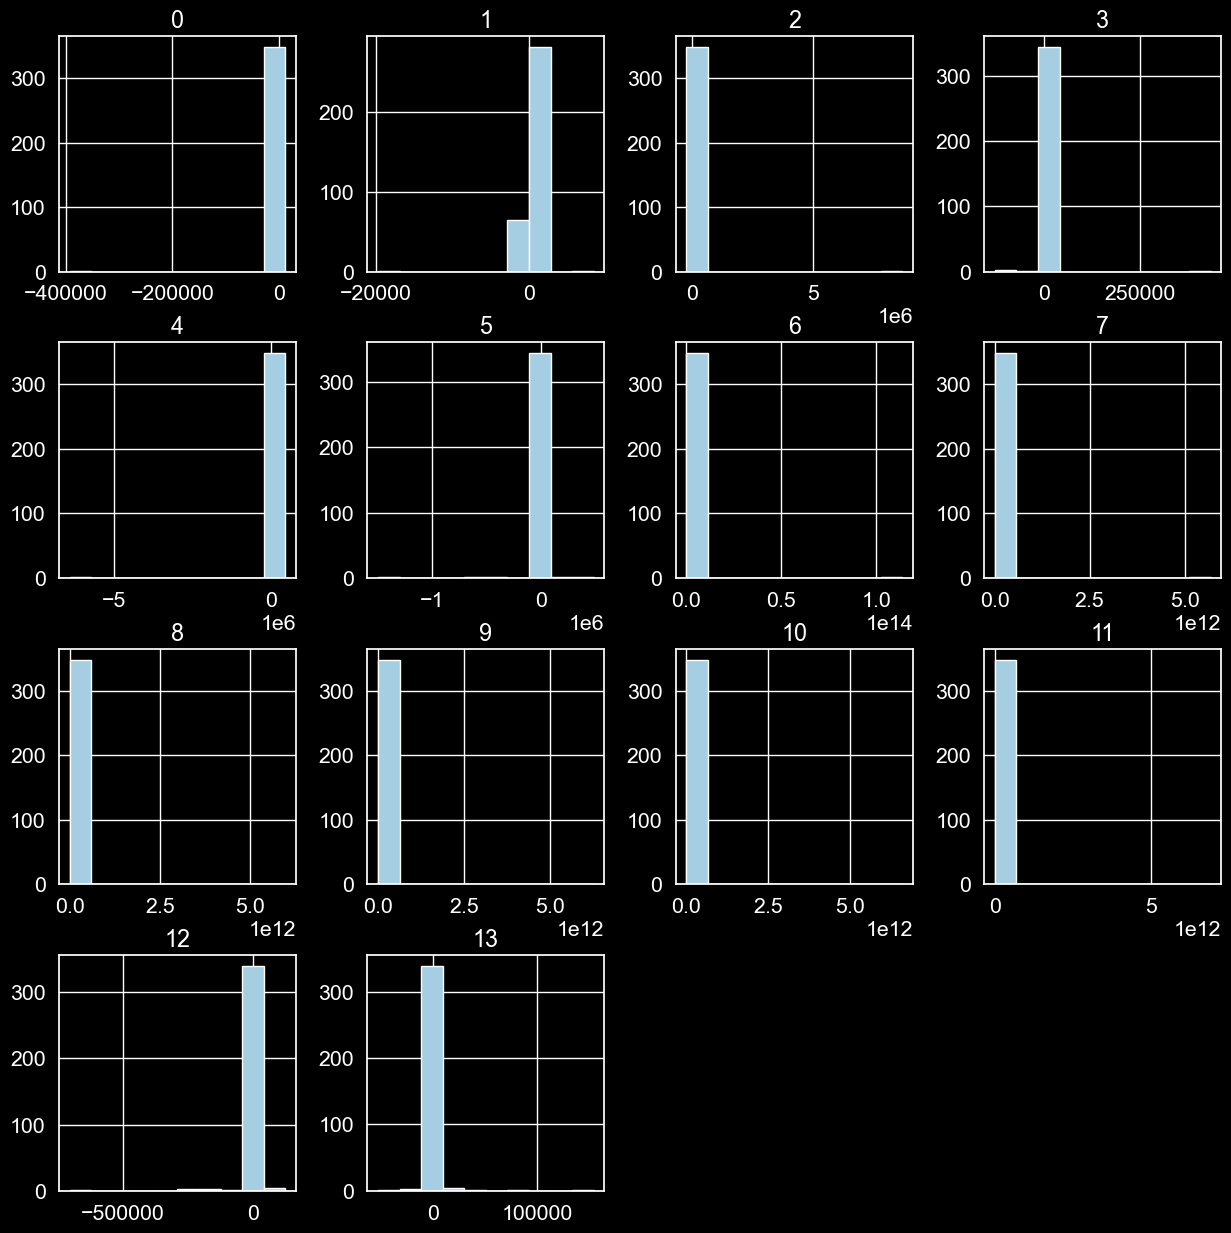

In [313]:
X.hist(figsize=(15, 15));

Стандартизируем данные

In [316]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Строим регрессию

In [317]:
cls = LinearRegression().fit(X, y);

In [318]:
cls.score(X, y)

0.0022498884755088877

Коэффициент детерминации $R^2 = 0.23$ очень мал. 

Модель нужно улучшать.

In [319]:
RSS = ((y - cls.predict(X)) ** 2).sum()
RSS

269814418.88297784

### 4. Не степенные преобразования таргета

In [330]:
new_y = y**2
cls_square = LinearRegression().fit(X, new_y)
cls_square.score(X, new_y)

0.00012473998652107188

In [332]:
from scipy.stats import normaltest

normaltest(y)

NormaltestResult(statistic=795.7261816949831, pvalue=1.6227629813166605e-173)

In [333]:
test = pd.DataFrame(pd.read_csv("exam3_test.csv"))
test = test.drop(columns=["Unnamed: 0"])
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,3.741790,2.164711,9.661665,31.550088,-118.813381,-1.566293,227.597318,12.322608,32.884928,10.158438,286.898214,-24.916678,-13.715450,-31.902187,NaN
1,0.210993,-237.169353,-86.872139,-21.248122,77.220711,-8.010998,-429.379836,-45.323088,-36.619384,-509.398725,-43.563442,-73.465477,2.866086,365.665618,NaN
2,-3.007635,39.341134,49.031677,39.141921,6.020159,8.018819,8.557621,-19.618712,-20.559881,-45.602537,-16.115951,-6.238253,-3.639376,-2.104993,NaN
3,-14.105105,-7.883664,-6.363761,-46.062737,14.356623,16.206397,-8.211626,-36.028835,-71.856990,-1.130617,-7.868869,48.858401,0.457567,0.127698,NaN
4,-0.076157,2.224851,2.098946,0.274917,-17.576850,50.476486,-11.992588,32.825928,-3.641442,858.204104,41.137452,77.111272,-30.164940,231.951704,NaN
5,0.531704,-21.209206,-9.158208,-9983.824584,-489.364384,-528.777983,-541.248195,-580.204978,-605.648168,-636.746582,-688.155686,-601.055185,10065.853906,-918.384028,NaN
6,-0.523366,0.278497,-3.552369,10.159968,-262.608003,161.271542,-3.973454,-71.799851,41.082580,-239.978569,-137.922185,-26.813970,171.409871,502.816114,NaN
7,226.538463,9.194271,-389.582318,-9.842656,104.941730,-3.924533,-11.287100,157.023485,7.091511,8.783047,-343.795804,-7.047312,13.658800,-0.114441,NaN
8,0.247205,5.087608,17.353835,1927.406172,102.146205,-168.604308,62.410688,157.823618,148.872306,158.854008,118.004131,127.447484,808.065001,415.081165,NaN
9,5.398882,0.509560,-9.420835,-31.203407,14.687398,47.289849,-1144.864257,-52.474038,-32.349674,-237.168343,-334.826395,-76.912735,13.926048,0.291659,NaN
